<b>Objectif :</b>

En utilisant le dataset `synthetic_housing_dataset.csv`, vous allez préparer un modèle de prediction de prix d'appartement étant données ses caractéristiques

<b>Directives :</b>

Veuillez suivre les étapes de `CRISP-DM` pour dévéloper le modèle.

## Compérehsnion du métier

In [270]:
import pandas as pd
data=pd.read_csv("synthetic_housing_dataset.csv")
data.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city,price
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,Paris,629535.486411
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,Lyon,682734.110117
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,Lyon,705054.855203
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,Marseille,550261.271344
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,Toulouse,510619.235213


## Compréhension des données

Diviser les données en entrée (features X) et sortie (cible y)

In [271]:
X = data.drop(columns=['price'])  # Assurez-vous que 'Prix' est bien le nom de la colonne cible
y = data['price']
#X.head()
y.head()

0    629535.486411
1    682734.110117
2    705054.855203
3    550261.271344
4    510619.235213
Name: price, dtype: float64

Diviser les données en train et test (X_train, X_test, y_train, y_test)

In [272]:
# Utiliser la fonction train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((80, 8), (20, 8))

Vérifier les types des colonnes

In [273]:
data.dtypes

size_m2                    float64
num_bedrooms               float64
num_bathrooms              float64
distance_school            float64
public_transport_access    float64
property_tax               float64
date_built                  object
city                        object
price                      float64
dtype: object

Analyse descriptive

In [274]:
data.describe()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,price
count,100.000000,95.000000,100.000000,100.000000,97.000000,100.000000,100.000000
mean,239.304605,2.911012,2.081660,4.712559,4.637516,955.294858,552958.490913
std,987.255056,0.955481,0.722163,2.897322,3.066544,803.084281,145741.541880
min,-50.000000,0.518600,0.075309,0.145447,-0.199299,-963.865284,126877.612975
25%,117.346484,2.345428,1.613437,2.028225,2.278455,469.459761,471887.796953
50%,139.866728,2.791213,2.111695,4.599573,4.546566,922.619185,556742.850477
75%,168.257576,3.438545,2.543021,6.938161,6.943386,1482.927155,648621.375838
max,10000.000000,5.522306,3.652681,9.997177,11.227652,3024.877889,910713.536337


Analyse des valeurs manquantes

In [275]:
X.isnull().sum()

size_m2                    0
num_bedrooms               5
num_bathrooms              0
distance_school            0
public_transport_access    3
property_tax               0
date_built                 0
city                       0
dtype: int64

Analyse des valeurs aberantes (outliers)

In [276]:
# Utiliser IQR
Q1 = data.quantile(0.25, numeric_only=True)  
Q3 = data.quantile(0.75, numeric_only=True)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = {}
for col in data.columns:
    if col in lower_bound.index:  
        outliers[col] = ((data[col] < lower_bound[col]) | (data[col] > upper_bound[col])).sum()
print("Nombre d'outliers par colonne :")
for col, count in outliers.items():
    print(f"{col}: {count}")

Nombre d'outliers par colonne :
size_m2: 4
num_bedrooms: 2
num_bathrooms: 1
distance_school: 0
public_transport_access: 0
property_tax: 1
price: 2


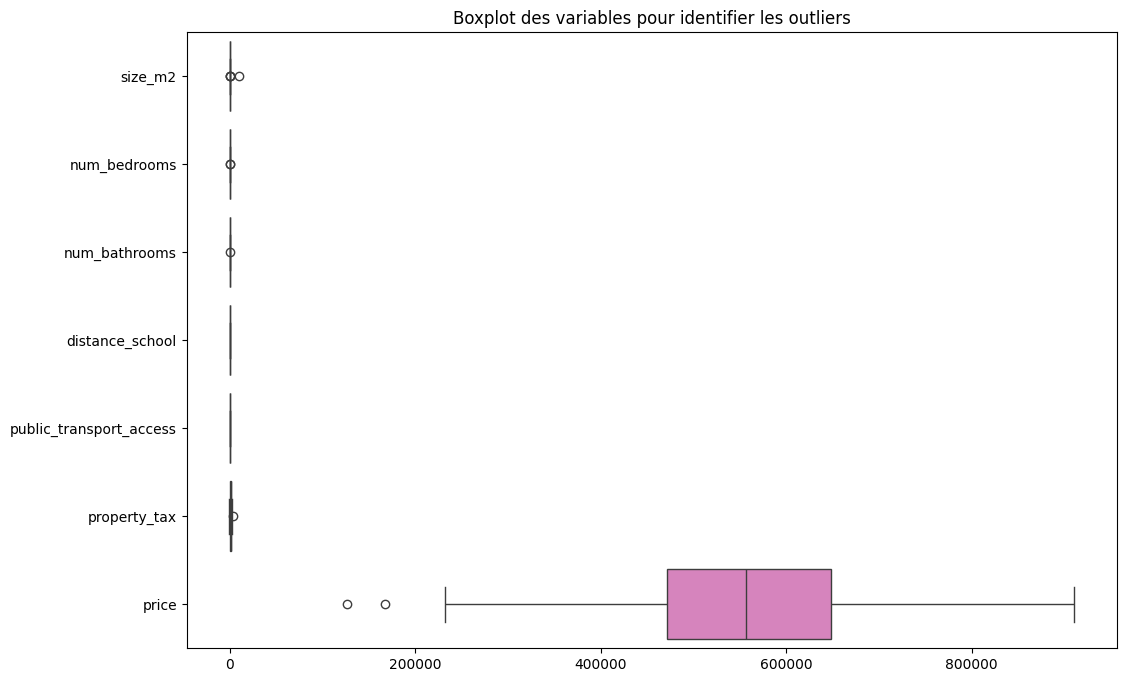

In [277]:
# Utiliser la fonction sns.boxplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='h')
plt.title("Boxplot des variables pour identifier les outliers")
plt.show()


## Préparation des données

Nettoyage des données

In [278]:
# Imputation des valeurs manquantes
median_numbedrooms=X['num_bedrooms'].median()
median_public_transport=X['public_transport_access'].median()
X['num_bedrooms'].fillna(median_numbedrooms, inplace = True)
X['public_transport_access'].fillna(median_public_transport, inplace = True)

C:\Users\INFO\AppData\Local\Temp\ipykernel_18464\3462899523.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['num_bedrooms'].fillna(median_numbedrooms, inplace = True)
C:\Users\INFO\AppData\Local\Temp\ipykernel_18464\3462899523.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [279]:
# Imputation des valeurs aberrantes
for col in data.columns:
    if col in lower_bound.index:
        # Limiter les valeurs inférieures à la borne inférieure
        data.loc[data[col] < lower_bound[col], col] = lower_bound[col]
        # Limiter les valeurs supérieures à la borne supérieure
        data.loc[data[col] > upper_bound[col], col] = upper_bound[col]

Transformation des données

In [280]:
# Encoder les variables catégorielles (enutilisnat OheHotEncoder)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(X[['city']])
categories = ohe.categories_[0]
encoded_city=ohe.transform(X[['city']])
encoded_city=encoded_city.toarray()
encoded_city
df_encoded_city=pd.DataFrame(encoded_city, 
                                    index=X.index,
                                    columns='city_'+categories)
df_encoded_city
X = pd.concat([X, df_encoded_city] ,  axis=1)
X.drop('city',axis=1,errors='ignore',inplace=True )
X



,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city_Lyon,city_Marseille,city_Paris,city_Toulouse
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,0.0,0.0,1.0,0.0
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,1.0,0.0,0.0,0.0
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,1.0,0.0,0.0,0.0
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,0.0,1.0,0.0,0.0
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,76.824253,1.729144,0.958907,2.093493,1.741980,964.452073,2011-01-01,0.0,0.0,0.0,1.0
96,164.806014,2.854192,2.534292,3.704721,3.723139,1363.986802,2017-01-01,0.0,1.0,0.0,0.0
97,163.052764,3.337918,2.390785,4.845230,6.521667,-67.649146,1981-01-01,0.0,0.0,0.0,1.0
98,150.255673,3.034218,2.309082,6.182548,6.509475,1065.165746,2003-01-01,1.0,0.0,0.0,0.0


In [281]:
# Tarnsformer la colonne date en mois
X['date_built'] = pd.to_datetime(X['date_built'])
X['month_built'] = X['date_built'].dt.month
X.drop(columns=['date_built'], inplace=True)
X

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,city_Lyon,city_Marseille,city_Paris,city_Toulouse,month_built
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,0.0,0.0,1.0,0.0,1
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,1.0,0.0,0.0,0.0,1
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1.0,0.0,0.0,0.0,1
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,0.0,1.0,0.0,0.0,1
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,76.824253,1.729144,0.958907,2.093493,1.741980,964.452073,0.0,0.0,0.0,1.0,1
96,164.806014,2.854192,2.534292,3.704721,3.723139,1363.986802,0.0,1.0,0.0,0.0,1
97,163.052764,3.337918,2.390785,4.845230,6.521667,-67.649146,0.0,0.0,0.0,1.0,1
98,150.255673,3.034218,2.309082,6.182548,6.509475,1065.165746,1.0,0.0,0.0,0.0,1


In [282]:
# Normaliser les données (en utilinsat STandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ss= scaler.fit_transform(X)
X = pd.DataFrame(X_ss, columns=X.columns, index=X.index)
X

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,city_Lyon,city_Marseille,city_Paris,city_Toulouse,month_built
0,9.936508,-0.125162,0.678526,-0.195770,0.385530,0.361734,-0.701810,-0.468521,1.564697,-0.5,0.0
1,-0.243615,-0.273657,0.103812,-0.686308,-0.715481,-1.894790,1.424887,-0.468521,-0.639101,-0.5,0.0
2,-0.294516,0.616471,1.030476,-1.439159,-1.163031,-0.906988,1.424887,-0.468521,-0.639101,-0.5,0.0
3,-0.013390,1.313062,1.892489,1.364877,1.439009,1.451185,-0.701810,2.134375,-0.639101,-0.5,0.0
4,-0.102832,-0.237195,-0.531060,1.185116,2.187660,-0.086084,-0.701810,-0.468521,-0.639101,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.165407,-1.268831,-1.562540,-0.908515,-0.962784,0.011460,-0.701810,-0.468521,-0.639101,2.0,0.0
96,-0.075840,-0.054849,0.629929,-0.349604,-0.303415,0.511467,-0.701810,2.134375,-0.639101,-0.5,0.0
97,-0.077625,0.467116,0.430210,0.046022,0.627991,-1.280186,-0.701810,-0.468521,-0.639101,2.0,0.0
98,-0.090653,0.139409,0.316504,0.509917,0.623934,0.137500,1.424887,-0.468521,-0.639101,-0.5,0.0


Optimisation des données

In [283]:
# Sélectionner les features les plus corrélées avec la cible (price)
# Par exemple, garder seulement les features ayant une corrélation (valeur absolue) > 0.1
data_scaled = pd.concat([X, y_train.reset_index(drop=True)], axis=1)
correlation_matrix = data_scaled.corr()
correlations_with_target = correlation_matrix['price'].drop('price') 
print("Corrélations avec la cible (price) :")
print(correlations_with_target)
selected_features = correlations_with_target[correlations_with_target.abs() > 0.1].index
print("\nFeatures sélectionnées :")
print(selected_features)
X_selected = X[selected_features]
print("\nFeatures après sélection (standardisées) :")
X_selected

Corrélations avec la cible (price) :
size_m2                    0.099816
num_bedrooms              -0.127088
num_bathrooms             -0.113752
distance_school            0.031185
public_transport_access    0.049415
property_tax               0.025632
city_Lyon                  0.144279
city_Marseille            -0.299978
city_Paris                 0.029839
city_Toulouse              0.073574
month_built                     NaN
Name: price, dtype: float64

Features sélectionnées :
Index(['num_bedrooms', 'num_bathrooms', 'city_Lyon', 'city_Marseille'], dtype='object')

Features après sélection (standardisées) :


,num_bedrooms,num_bathrooms,city_Lyon,city_Marseille
0,-0.125162,0.678526,-0.701810,-0.468521
1,-0.273657,0.103812,1.424887,-0.468521
2,0.616471,1.030476,1.424887,-0.468521
3,1.313062,1.892489,-0.701810,2.134375
4,-0.237195,-0.531060,-0.701810,-0.468521
...,...,...,...,...
95,-1.268831,-1.562540,-0.701810,-0.468521
96,-0.054849,0.629929,-0.701810,2.134375
97,0.467116,0.430210,-0.701810,-0.468521
98,0.139409,0.316504,1.424887,-0.468521


In [284]:
# Réduire les features en utilinsat ACP
# Garder uniquement les 2 features les plus influentes en inertie
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_selected.index)
print("Données réduites (2 composantes principales) :")
print(X_pca_df.head())
print("\nVariance expliquée par les composantes principales :")
print(pca.explained_variance_ratio_)

Données réduites (2 composantes principales) :
        PC1       PC2
0 -0.392042  0.038125
1  0.749052  1.148917
2 -0.368401  1.780395
3 -2.979838 -0.562907
4  0.410410 -0.458634

Variance expliquée par les composantes principales :
[0.5070834  0.27722092]


## Modeling

In [285]:
# Entrainer la Regression Linéaire avec les données de train
from sklearn.linear_model import LinearRegression
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape
model = LinearRegression()
model.fit(X_pca_train, y_train)
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)


Coefficients : [-51081.35662871  56313.03524564]
Intercept : 552504.9209529408


## Evaluation

Prédire les sorties des données de train et de test avec le modèle entrainé

In [286]:
# Prédictions sur les données d'entraînement
y_train_pred = model.predict(X_pca_train)

# Prédictions sur les données de test
y_test_pred = model.predict(X_pca_test)

# Afficher les résultats
print("Prédictions sur les données d'entraînement :")
print(y_train_pred[:5])  # Afficher les 5 premières prédictions

print("\nPrédictions sur les données de test :")
print(y_test_pred[:5])  # Afficher les 5 premières prédictions


Prédictions sur les données d'entraînement :
[585155.97234417 480419.85482505 449607.98935391 548821.26040642
 510284.22150552]

Prédictions sur les données de test :
[458473.06186139 640652.17361321 590252.17591251 494867.95979508
 388234.93896319]


In [287]:
# Comparer les valeurs réelles et prédites
comparison = pd.DataFrame({
    'Réel': y_train,
    'Prédit': y_train_pred
})

print("Comparaison entre les valeurs réelles et prédites :")
print(comparison.head())


Comparaison entre les valeurs réelles et prédites :
             Réel         Prédit
55  690508.152027  585155.972344
88  531066.128726  480419.854825
26  620268.841345  449607.989354
42  509430.593648  548821.260406
69  503473.593963  510284.221506


In [290]:
# Comparer les valeurs réelles et prédites
comparison = pd.DataFrame({
    'Réel': y_test,
    'Prédit': y_test_pred
})

print("Comparaison entre les valeurs réelles et prédites :")
print(comparison.head())

Comparaison entre les valeurs réelles et prédites :
             Réel         Prédit
83  606088.345873  458473.061861
53  617536.984298  640652.173613
70  635310.160094  590252.175913
45  681861.509872  494867.959795
44  432014.914722  388234.938963


Evaluer la performance du modèle

In [ ]:
# Calculer MSE
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("\nÉvaluation des performances :")
print(f"Ensemble d'entraînement - MSE : {mse_train:.2f}")
print(f"Ensemble de test - MSE : {mse_test:.2f}")



Évaluation des performances :
Ensemble d'entraînement - MSE : 13003943970.19
Ensemble de test - MSE : 14521111245.67


In [292]:
# Calculer R2
r2_train = r2_score(y_train, y_train_pred)

# Calculer R² pour l'ensemble de test
r2_test = r2_score(y_test, y_test_pred)

# Afficher les résultats
print(f"R² sur l'ensemble d'entraînement : {r2_train:.2f}")
print(f"R² sur l'ensemble de test : {r2_test:.2f}")


R² sur l'ensemble d'entraînement : 0.40
R² sur l'ensemble de test : 0.20


## Déploiement

Utiliser le modèle évalué pour prédire le prix d'un apprtement quelconque

In [301]:
import pandas as pd

# Exemple de caractéristiques pour un appartement quelconque
appartement = pd.DataFrame({
   
    'num_bedrooms': [4.50],
    'num_bathrooms': [2.67],
    'city_Lyon': [1],
    'city_Marseille': [0],
    
})

appartement_s=scaler.transform(appartement)
appartement_pca=pca.transform(appartement_s)
predicted_price =model.predict(appartement_pca)

print(f"Le prix prédit pour cet appartement est : {predicted_price[0]:.2f} €")




Le prix prédit pour cet appartement est : 552504.92 €


d:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
